In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency


In [3]:
# Load the datasets
patients_df = pd.read_csv('cleaned_PATIENTS.csv')
admissions_df = pd.read_csv('cleaned_ADMISSIONS.csv')

   ROW_ID  SUBJECT_ID GENDER         DOB         DOD             DOD_HOSP  \
0     234         249      F  2075-03-13         NaN                  NaN   
1     235         250      F  2164-12-27  2188-11-22  2188-11-22 00:00:00   
2     236         251      M  2090-03-15         NaN                  NaN   
3     237         252      M  2078-03-06         NaN                  NaN   
4     238         253      F  2089-11-26         NaN                  NaN   

  DOD_SSN  EXPIRE_FLAG  
0     NaN            0  
1     NaN            1  
2     NaN            0  
3     NaN            0  
4     NaN            0  
   ROW_ID  SUBJECT_ID  HADM_ID            ADMITTIME            DISCHTIME  \
0      21          22   165315  2196-04-09 12:26:00  2196-04-10 15:54:00   
1      22          23   152223  2153-09-03 07:15:00  2153-09-08 19:10:00   
2      23          23   124321  2157-10-18 19:34:00  2157-10-25 14:00:00   
3      24          24   161859  2139-06-06 16:14:00  2139-06-09 12:48:00   
4      

In [4]:
patients_df.head()

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13,NaN,NaN,NaN,0
1,235,250,F,2164-12-27,2188-11-22,2188-11-22 00:00:00,NaN,1
2,236,251,M,2090-03-15,NaN,NaN,NaN,0
3,237,252,M,2078-03-06,NaN,NaN,NaN,0
4,238,253,F,2089-11-26,NaN,NaN,NaN,0


In [5]:
admissions_df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_LOCATION,DISCHARGE_LOCATION,EDREGTIME,EDOUTTIME,...,ETHNICITY_PATIENT DECLINED TO ANSWER,ETHNICITY_PORTUGUESE,ETHNICITY_SOUTH AMERICAN,ETHNICITY_UNABLE TO OBTAIN,ETHNICITY_UNKNOWN/NOT SPECIFIED,ETHNICITY_WHITE,ETHNICITY_WHITE - BRAZILIAN,ETHNICITY_WHITE - EASTERN EUROPEAN,ETHNICITY_WHITE - OTHER EUROPEAN,ETHNICITY_WHITE - RUSSIAN
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,2196-04-09 10:06:00,2196-04-09 13:24:00,...,False,False,False,False,False,True,False,False,False,False
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,NaN,NaN,...,False,False,False,False,False,True,False,False,False,False
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,NaN,NaN,...,False,False,False,False,False,True,False,False,False,False
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,TRANSFER FROM HOSP/EXTRAM,HOME,NaN,NaN,...,False,False,False,False,False,True,False,False,False,False
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY ROOM ADMIT,HOME,2160-11-02 01:01:00,2160-11-02 04:27:00,...,False,False,False,False,False,True,False,False,False,False


In [6]:
# Merging the datasets on 'SUBJECT_ID'
merged_df = pd.merge(patients_df[['SUBJECT_ID', 'EXPIRE_FLAG']], admissions_df, on='SUBJECT_ID')
merged_df.head()

,SUBJECT_ID,EXPIRE_FLAG,ROW_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_LOCATION,DISCHARGE_LOCATION,EDREGTIME,...,ETHNICITY_PATIENT DECLINED TO ANSWER,ETHNICITY_PORTUGUESE,ETHNICITY_SOUTH AMERICAN,ETHNICITY_UNABLE TO OBTAIN,ETHNICITY_UNKNOWN/NOT SPECIFIED,ETHNICITY_WHITE,ETHNICITY_WHITE - BRAZILIAN,ETHNICITY_WHITE - EASTERN EUROPEAN,ETHNICITY_WHITE - OTHER EUROPEAN,ETHNICITY_WHITE - RUSSIAN
0,249,0,321,116935,2149-12-17 20:41:00,2149-12-31 14:55:00,NaN,EMERGENCY ROOM ADMIT,SNF,2149-12-17 11:10:00,...,False,False,False,False,False,True,False,False,False,False
1,249,0,322,149546,2155-02-03 20:16:00,2155-02-14 11:15:00,NaN,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,2155-02-03 17:43:00,...,False,False,False,False,False,True,False,False,False,False
2,249,0,323,158975,2156-04-27 15:33:00,2156-05-14 15:30:00,NaN,PHYS REFERRAL/NORMAL DELI,SNF,NaN,...,False,False,False,False,False,True,False,False,False,False
3,250,1,324,124271,2188-11-12 09:22:00,2188-11-22 12:00:00,2188-11-22 12:00:00,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,2188-11-12 06:56:00,...,False,False,False,False,False,False,False,False,False,False
4,251,0,325,117937,2110-07-27 06:46:00,2110-07-29 15:23:00,NaN,EMERGENCY ROOM ADMIT,HOME,2110-07-27 05:00:00,...,False,False,False,False,True,False,False,False,False,False


In [7]:
merged_df.isna().sum()

SUBJECT_ID                            0
EXPIRE_FLAG                           0
ROW_ID                                0
HADM_ID                               0
ADMITTIME                             0
                                     ..
ETHNICITY_WHITE                       0
ETHNICITY_WHITE - BRAZILIAN           0
ETHNICITY_WHITE - EASTERN EUROPEAN    0
ETHNICITY_WHITE - OTHER EUROPEAN      0
ETHNICITY_WHITE - RUSSIAN             0
Length: 163, dtype: int64

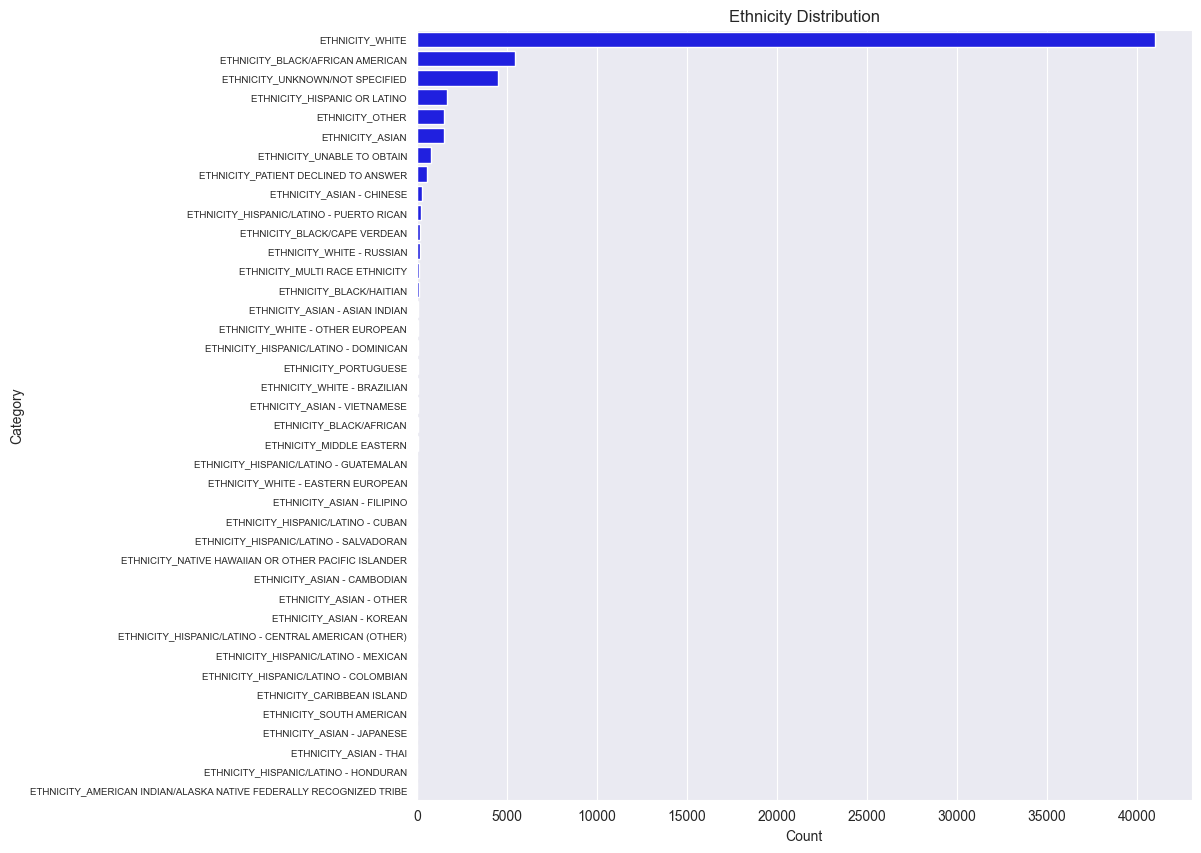

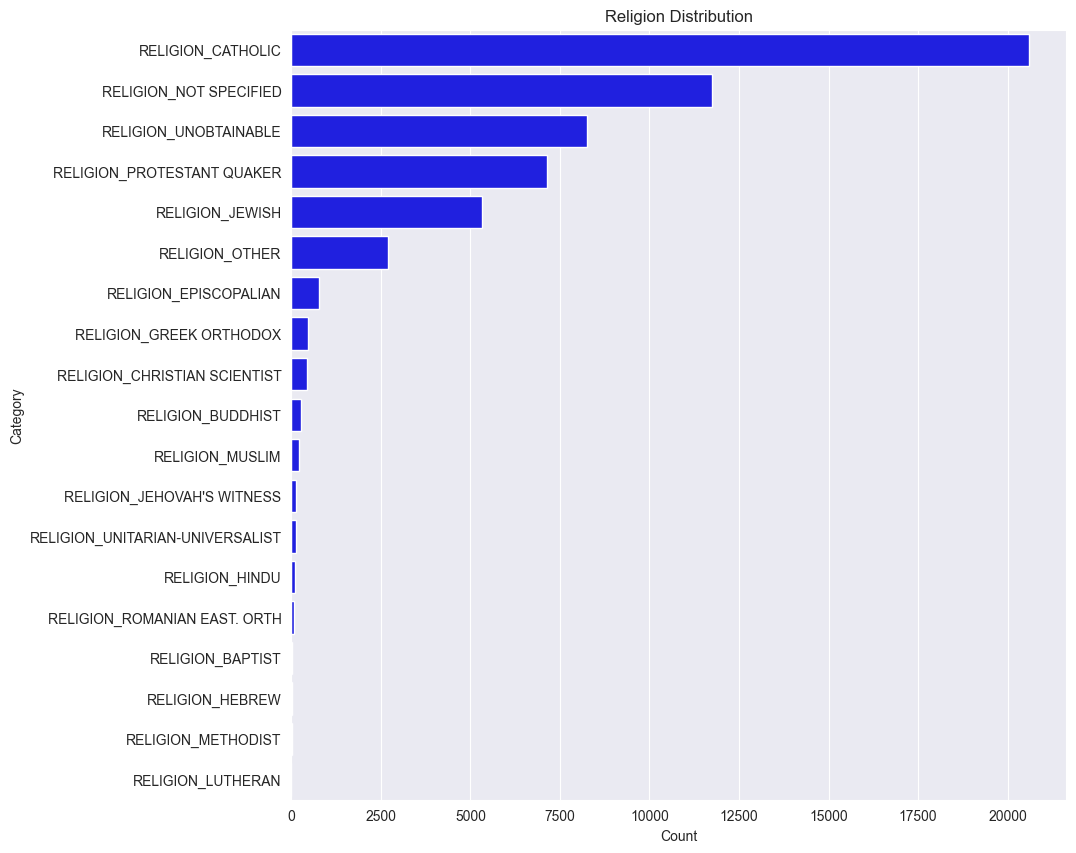

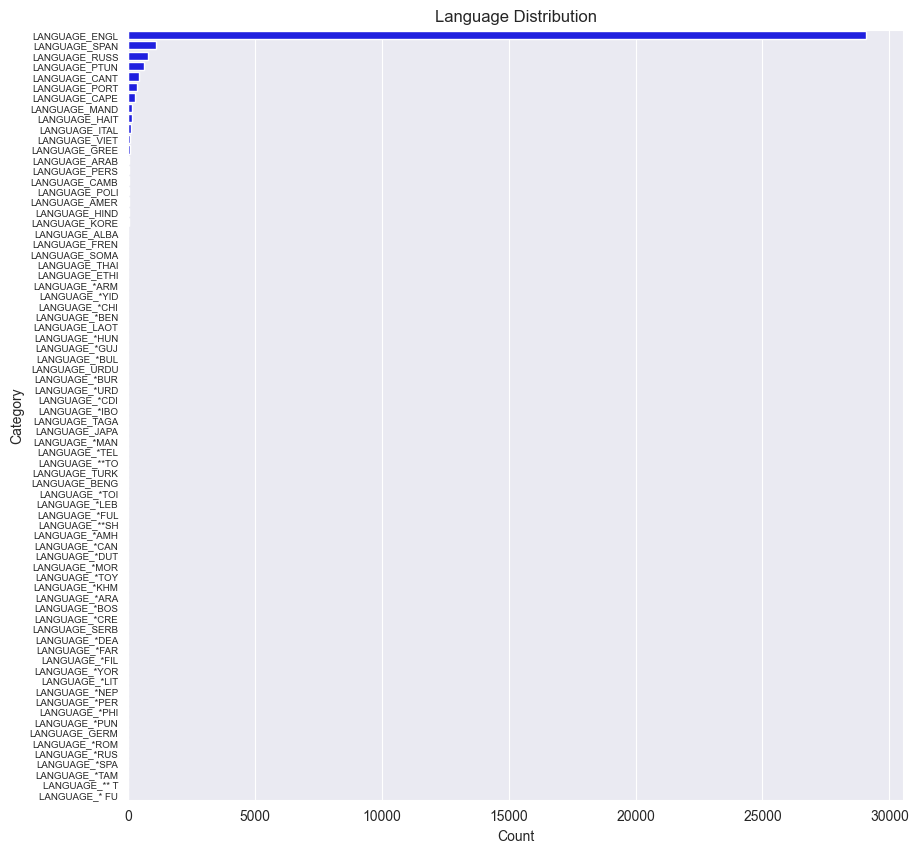

In [23]:
# Example columns (assuming these exist based on the structure) for simplicity in visualization:
ethnicity_columns = [col for col in merged_df.columns if 'ETHNICITY_' in col]
religion_columns = [col for col in merged_df.columns if 'RELIGION_' in col]
language_columns = [col for col in merged_df.columns if 'LANGUAGE_' in col]

# Creating a function to plot distributions for given columns
def plot_demographic_distribution(columns, title, font_size):
    # Summing up the counts for each demographic category
    demographic_counts = merged_df[columns].sum().sort_values(ascending=False)
    # Plot
    plt.figure(figsize=(10, 10))
    barplot = sns.barplot(x=demographic_counts.values, y=demographic_counts.index, color="blue")
    plt.title(title)
    plt.xlabel('Count')
    plt.yticks(fontsize=font_size) 
    plt.ylabel('Category')
    plt.show()

# Plotting for each demographic
plot_demographic_distribution(ethnicity_columns, 'Ethnicity Distribution', 7)
plot_demographic_distribution(religion_columns, 'Religion Distribution', 10)
plot_demographic_distribution(language_columns, 'Language Distribution', 7)

/var/folders/kw/fxbbvv5x7lvct1l7rdc18tkw0000gn/T/ipykernel_82643/1608156938.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mortality_rate = merged_df.groupby(col)['EXPIRE_FLAG'].mean()[1] * 100


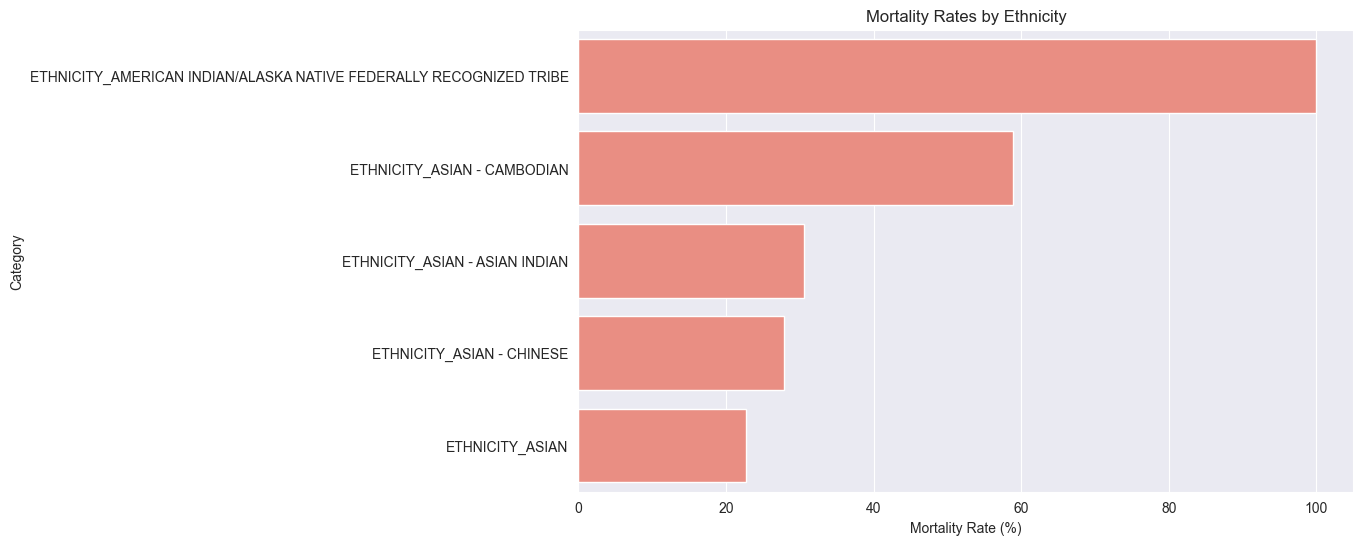

/var/folders/kw/fxbbvv5x7lvct1l7rdc18tkw0000gn/T/ipykernel_82643/1608156938.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mortality_rate = merged_df.groupby(col)['EXPIRE_FLAG'].mean()[1] * 100


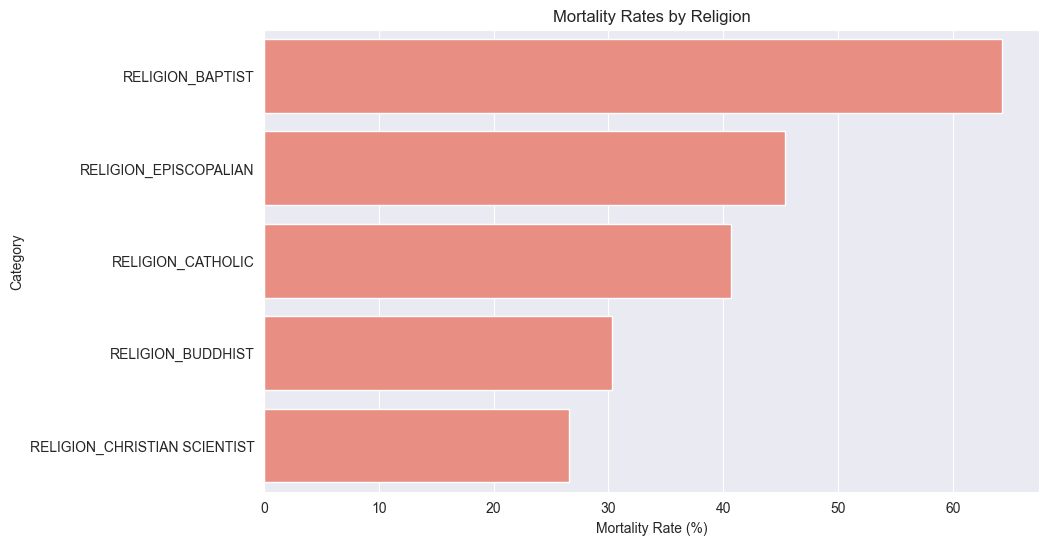

/var/folders/kw/fxbbvv5x7lvct1l7rdc18tkw0000gn/T/ipykernel_82643/1608156938.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mortality_rate = merged_df.groupby(col)['EXPIRE_FLAG'].mean()[1] * 100


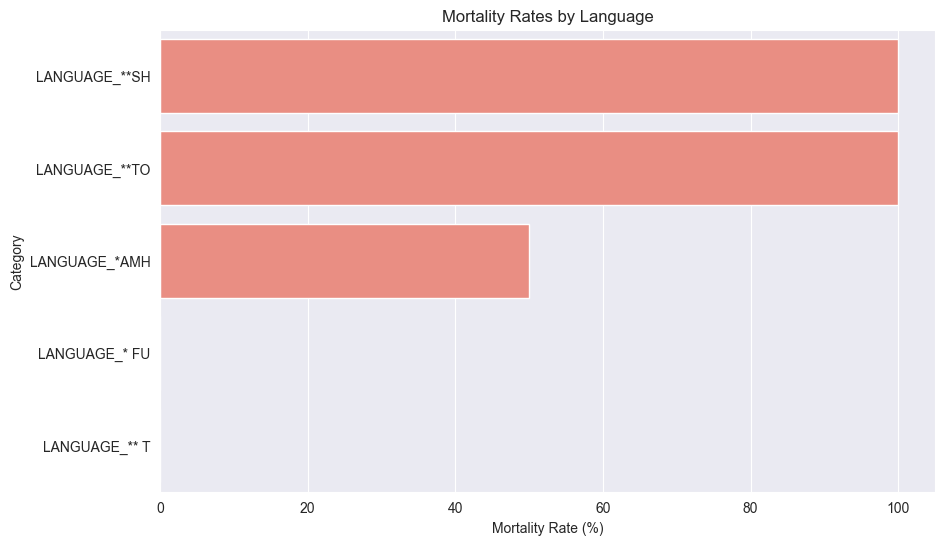

In [19]:
# Function to calculate and plot mortality rates for given demographic categories
def plot_mortality_rates(columns, title):
    mortality_rates = {}
    for col in columns:
        if merged_df[col].sum() > 0:  
            mortality_rate = merged_df.groupby(col)['EXPIRE_FLAG'].mean()[1] * 100
            mortality_rates[col] = mortality_rate
    
    # Sorting the mortality rates for plotting
    mortality_rates_sorted = {k: v for k, v in sorted(mortality_rates.items(), key=lambda item: item[1], reverse=True)}
    
    # Creating the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(mortality_rates_sorted.values()), y=list(mortality_rates_sorted.keys()), color="salmon")
    plt.title(f'Mortality Rates by {title}')
    plt.xlabel('Mortality Rate (%)')
    plt.ylabel('Category')
    plt.show()

# Plotting mortality rates across a few selected demographic categories
plot_mortality_rates(ethnicity_columns[:5], 'Ethnicity')
plot_mortality_rates(religion_columns[:5], 'Religion')
plot_mortality_rates(language_columns[:5], 'Language')

In [12]:
# Function to perform chi-square tests for a list of columns
def chi_square_test_for_columns(columns):
    results = {}
    for col in columns:
        # Create a contingency table
        table = pd.crosstab(merged_df[col], merged_df['EXPIRE_FLAG'])
        # Perform the chi-square test
        chi2, p, dof, expected = chi2_contingency(table)
        # Store the results
        results[col] = p
    return results

# Performing chi-square tests for a few selected demographics (for example purposes)
# We will use the same example columns as before for simplicity, but in a real analysis,
# one might choose specific categories of interest based on preliminary findings or hypotheses.

ethnicity_results = chi_square_test_for_columns(ethnicity_columns[:5]) # Limiting to the first few for brevity
religion_results = chi_square_test_for_columns(religion_columns[:5]) # Limiting to the first few for brevity
language_results = chi_square_test_for_columns(language_columns[:5]) # Limiting to the first few for brevity

ethnicity_results, religion_results, language_results

({'ETHNICITY_AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE': 0.10855487714913457,
  'ETHNICITY_ASIAN': 1.4681305031816418e-36,
  'ETHNICITY_ASIAN - ASIAN INDIAN': 0.17655573292402235,
  'ETHNICITY_ASIAN - CAMBODIAN': 0.135757173646329,
  'ETHNICITY_ASIAN - CHINESE': 0.00039834938437499737},
 {'RELIGION_BAPTIST': 0.008408237523476731,
  'RELIGION_BUDDHIST': 0.008828804932731778,
  'RELIGION_CATHOLIC': 1.6729036996248767e-18,
  'RELIGION_CHRISTIAN SCIENTIST': 6.919745857281423e-07,
  'RELIGION_EPISCOPALIAN': 5.686876991500705e-05},
 {'LANGUAGE_* FU': 1.0,
  'LANGUAGE_** T': 1.0,
  'LANGUAGE_**SH': 0.28561139283448284,
  'LANGUAGE_**TO': 0.10855487714913457,
  'LANGUAGE_*AMH': 1.0})